<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW4/MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex



In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR for that matter) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v^2\propto\frac{1}{r}$

You will use astropy in this exercise, a popular and powerfull package for astrophysical analysis in python. One of the most interesting and unique characteristics of astropy is that it allows treatment of units. When you have a quantity (say `x=3`) in python you can express it with the appropriate units (say meters) as `x=3 * u.meter`

In [2]:
#example
x = 3
x

3

In [3]:
x_in_m = x * u.meter
x_in_m

<Quantity 3. m>

once the quantities have units they can be converted with astropy methods: e.g.

In [4]:
x_in_km = x_in_m.to(u.kilometer)
x_in_km

<Quantity 0.003 km>

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)


$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass  (the geometric center for simplicity) of the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Assignment: Derive this $v^2 \propto\frac{1}{r}$ at different distances from the center of the Galaxy for M31 and the Milky Way from Newron's law $F~=~\frac{GMm}{r^2}$.

Write each formula you use and describe each step in text cells within this notebook.

You can use latex to write the formulate(you really just need to know ```\frac{}``` for the fractions and ```^``` for the powers) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

With $\vec{r}$ being the position vector in polar coordinates $(\rho, \theta)$, then $\dot{\vec{r}} = \rho \dot{\theta}\hat{\theta}$ with $\dot{\rho}=0$ and $\dot{\theta}$ constant for stable circular motion.
\begin{align}
    \ddot{\vec{r}} &= \frac{d}{dt} \rho \dot{\theta} \hat{\theta} & \\
                   &= \rho \dot{\theta} \frac{d}{dt} \hat{\theta} & \text{constant tangential velocity} \\
                   &= \rho \dot{\theta} (-\dot{\theta} \hat{\rho}) & \frac{d}{dt}\hat{\theta} = - \dot{\theta}\hat{\rho} \\
                   &= -\rho \dot{\theta}^2 \hat{\rho} & \\
    \vec{a}        &= -\frac{v^2}{\rho} \hat{\rho} & \dot{\theta} = \frac{v}{\rho}
\end{align}
Now we can use Newton's law of universal gravitation along with Newton's second law to arrive at an equation for a mass $M$ in the galaxy:
\begin{align}
    \vec{F} &= M\vec{a} & \\
    -\frac{GMm(\rho)}{\rho^2}\hat{\rho} &= M (-\frac{v^2}{\rho} \hat{\rho}) & \text{substitution and newton's shell theorem} \\
    \frac{gm(\rho)}{\rho} &= v^2  & \\
    v^2 &\propto \frac{m(r)}{r} & \text{using $r$ instead of $\rho$}
\end{align}


Is M constant as r increases? If not, isn't this all invalid?

## M31 rotational curve

### data ingestion
Orignal data in https://academic.oup.com/pasj/article-abstract/67/4/75/1536635?redirectedFrom=fulltext&login=false but I converted it to csv already for you

Get the data from the github repository https://github.com/fedhere/DSPS_FBianco/tree/master/HW4 : there are 2 files: mw.csv for the Millky Way and m31.csv for M31,the Andromeda galaxy. Start with M31,  Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty derived by propagating the uncertainty in the measured  wavelength of the HII line. The uncertainty called ```err``` is the remaining error budget. To include all sources combine in quadrature the uncertiainties `dv` and `err` and call that `err_tot` including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [5]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/m31.csv')

In [6]:
m31.head()

,#M31,Grand,Rotation,Curve
0,#R(kpc,V(km/s),St.dev.,St.error
1,0.100,183.939,0.000,0.000
2,0.120,190.710,10.265,12.191
3,0.144,204.141,22.634,21.808
4,0.173,207.601,4.573,4.200


In [7]:
#remove the units row
m31_units = m31.iloc[0]
m31 = m31.loc[1:]

#create correctly typed columns with better names
m31['rad'] = pd.to_numeric(m31['#M31']).map(lambda x: x * u.kiloparsec)
m31['vel'] = pd.to_numeric(m31['Grand']).map(lambda x : x * u.kilometer / u.second)
m31['dv']  = pd.to_numeric(m31['Rotation']).map(lambda x : x * u.kilometer / u.second)
m31['err'] = pd.to_numeric(m31['Curve']).map(lambda x : x * u.kilometer / u.second)

In [8]:
m31['err_tot'] = (m31['dv']**2 + m31['err']**2)**0.5
m31.head()

,#M31,Grand,Rotation,Curve,rad,vel,dv,err,err_tot
1,0.100,183.939,0.000,0.000,0.1 kpc,183.939 km / s,0.0 km / s,0.0 km / s,0.0 km / s
2,0.120,190.710,10.265,12.191,0.12 kpc,190.71 km / s,10.265 km / s,12.191 km / s,15.937085869129275 km / s
3,0.144,204.141,22.634,21.808,0.144 kpc,204.141 km / s,22.634 km / s,21.808 km / s,31.4306668717035 km / s
4,0.173,207.601,4.573,4.200,0.173 kpc,207.601 km / s,4.573 km / s,4.2 km / s,6.209052182096717 km / s
5,0.207,210.188,3.943,3.258,0.207 kpc,210.188 km / s,3.943 km / s,3.258 km / s,5.1148619727222355 km / s


# exploratory data analysis
proceed with at least a few basic exploratory tasks

- what is the shape of the dataset?

- what are the statistical properties of the dataset? like the mean and variance of each column etc etc? do you remember how to get them with a single python line of code?

Look at the mean and the median of each column - what can you say about the distribution based on the comparison of these two numbers?

In [9]:
m31.shape

(55, 9)

In [10]:
def my_to_numeric(ent):
    if hasattr(ent, 'value'):
        return pd.to_numeric(ent.value)
    else:
        return pd.to_numeric(ent)
m31_stats = m31.map(my_to_numeric).describe()
m31_stats

,#M31,Grand,Rotation,Curve,rad,vel,dv,err,err_tot
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855,205.853182,226.079255,55.034818,16.165855,57.781110
std,415.523904,42.799892,49.254792,14.876951,415.523904,42.799892,49.254792,14.876951,50.970282
min,0.100000,121.974000,0.000000,0.000000,0.100000,121.974000,0.000000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000,1.177000,208.894500,11.945500,3.224000,12.956817
50%,13.737000,229.124000,30.697000,12.065000,13.737000,229.124000,30.697000,12.065000,32.684957
75%,161.675000,244.102500,99.980000,23.641000,161.675000,244.102500,99.980000,23.641000,107.040605
max,1887.071000,414.942000,147.835000,54.110000,1887.071000,414.942000,147.835000,54.110000,152.201397


In [11]:
(m31_stats.loc['mean'] - m31_stats.loc['50%'])/m31_stats.loc['std']

#M31        0.462347
Grand      -0.071139
Rotation    0.494121
Curve       0.275652
rad         0.462347
vel        -0.071139
dv          0.494121
err         0.275652
err_tot     0.492368
dtype: float64

In [12]:
m31_stats.loc['mean'] / m31_stats.loc['std']

#M31        0.495406
Grand       5.282239
Rotation    1.117350
Curve       1.086638
rad         0.495406
vel         5.282239
dv          1.117350
err         1.086638
err_tot     1.133624
dtype: float64

The most striking results are the heavy tails in the positive direction to the distribution (which I quantified as (mean - median)/std). The only measurment which breaks this is the 'grand' measurement.

Make a histogram of each column of the dataframe and comment on the shape of the distribution in the caption. Remember the axis labels which, when we work with physical quantities, shoudl also state what units are used.

Text(0.5, 0.98, 'Five histograms of the five columns')

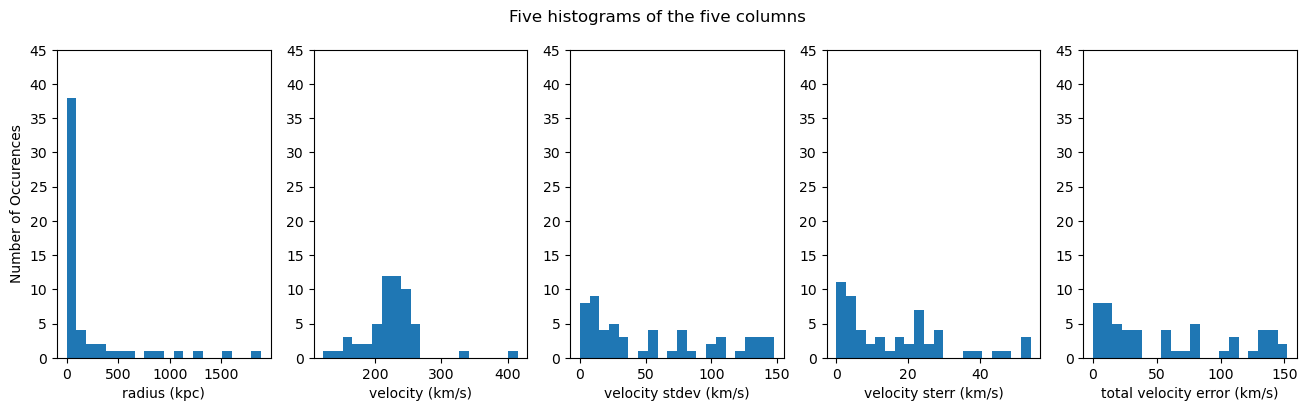

In [13]:
keys = ['rad', 'vel', 'dv', 'err', 'err_tot']
names = ['radius', 'velocity', 'velocity stdev', 'velocity sterr', 'total velocity error']
units = ['kpc', 'km/s', 'km/s', 'km/s', 'km/s']
fig, ax = plt.subplots(1, len(keys), figsize=(16,4))
# plt.hist(m31['m31_num'])
for i, key in enumerate(keys):
    ax[i].set_xlabel(f'{names[i]} ({units[i]})')
    ax[i].hist(m31[key].map(my_to_numeric), bins=20)
    ax[i].set_ylim([0, 45])

ax[0].set_ylabel('Number of Occurences')
fig.suptitle('Five histograms of the five columns')

Caption: Set of five historgrams composes of different data from the same sample. Begining with the radius histogram, we see that nearly all of the sub-galactic objects are located within only a few hundred kiloparsecs. However, there are outliers which are greater than 500 kiloparsecs. The velocity histogram follows an opposite trend: there are very few low velocity objects but then it ramps up tod a sharp dropoff. After this, there are only two objects. All three of the right plots (measures of uncertainty) share similar structure. This structure quite mulltimodal with many local peaks.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   

In [14]:
dist_m31 = 778 * u.kiloparsec
ddist_m31 = 33 * u.kiloparsec

theta_m31 = 3.167 * u.degree

extent_m31 = dist_m31 * theta_m31.to(u.rad)/u.rad
dextent_m31 = ddist_m31 * theta_m31.to(u.rad)/u.rad
print(f'the maximal extent of the luminous portion of Andromeda: {extent_m31:.2f}+-{dextent_m31:.3f}')

the maximal extent of the luminous portion of Andromeda: 43.00 kpc+-1.824 kpc


In [15]:
m31angS = 3.167 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia and me

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

Calculate and print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [16]:
print("Size of the visible component of Andromeda: " +
      r"{:.2f} +/- {:.3f}".format(extent_m31, dextent_m31))#, m31SizeError


Size of the visible component of Andromeda: 43.00 kpc +/- 1.824 kpc


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [17]:
m31_tmp = m31[m31['rad'].map(my_to_numeric) >= my_to_numeric(extent_m31)]
m31_min_outer = m31.iloc[m31_tmp['rad'].idxmin()]
print(f'The radius and velocity of this object are: (r,v) = ({m31_min_outer['rad']:.2f}, {m31_min_outer['vel']:.2f} +- {m31_min_outer['err_tot']:.2f})')

The radius and velocity of this object are: (r,v) = (59.07 kpc, 249.44 km / s +- 137.13 km / s)


We expect the velocity to decrease as $1 / \sqrt{r}$ if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor $\sqrt{2}$ slower, three times as far a factor $\sqrt{3}$ slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [18]:
# first measurement including all mass

def getradii(galdf, N, radius):
  Nradius = N * radius
  tmp = galdf[galdf['rad'].map(my_to_numeric) >= my_to_numeric(Nradius.to(u.kiloparsec))]
  if len(tmp) == 0:
    return None
  tmp = galdf.iloc[tmp['rad'].idxmin()]
  tmp = {
    'rad' : tmp['rad'],
    'vel' : tmp['vel'],
    'dv'  : tmp['dv'],
    'err'  : tmp['err'],
  }
  return tmp
def getradii(galdf, N, radius):
    Nradius = N * radius
    valid_rows = galdf[galdf['rad'].map(my_to_numeric) >= my_to_numeric(Nradius.to(u.kiloparsec))]
    if len(valid_rows) == 0:
        return None
    # Get the row with minimum radius from valid rows
    min_row = valid_rows.loc[valid_rows['rad'].map(my_to_numeric).idxmin()]
    return {
        'rad' : min_row['rad'],
        'vel' : min_row['vel'],
        'dv'  : min_row['dv'],
        'err' : min_row['err'],
    }
getradii(m31, 1, extent_m31/2 )


{'rad': <Quantity 23.738 kpc>,
 'vel': <Quantity 236.511 km / s>,
 'dv': <Quantity 11.729 km / s>,
 'err': <Quantity 1.58 km / s>}

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

<Quantity 21.50181061 kpc>

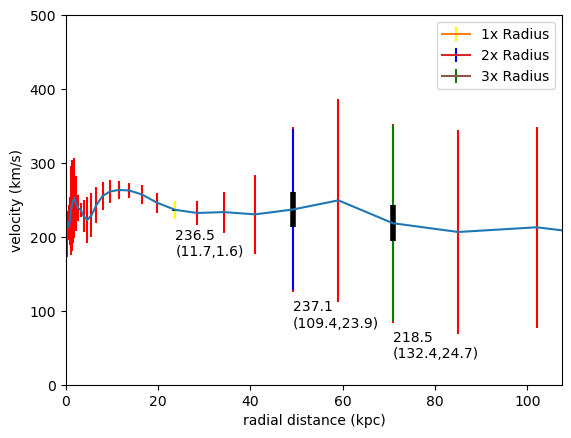

In [19]:
#delete leave plot
def plotGal(gal, rds, ax):
    numgal = gal.map(my_to_numeric)
    # ax.plot(numgal['rad'], numgal['vel'], color='r')
    ax.errorbar(numgal['rad'], numgal['vel'], numgal['err_tot'], ecolor='red')
    barcolors = ['yellow', 'blue', 'green']
    bars = []
    for i in range(3):
        point = getradii(gal, i+1, rds)
        bars.append(ax.errorbar(point['rad'], point['vel'], point['dv'], ecolor=barcolors[i]))
        ax.errorbar(point['rad'], point['vel'], point['err'], ecolor='k', elinewidth=4)
        vel = my_to_numeric(point['vel'])
        dv  = my_to_numeric(point['dv'])
        err = my_to_numeric(point['err'])
        ax.text(my_to_numeric(point['rad']), my_to_numeric(point['vel'] - point['dv']) - 50,
            f'{vel:.1f}\n({dv:.1f},{err:.1f})')
    
    ax.legend(bars, [
        '1x Radius',
        '2x Radius',
        '3x Radius',
    ]
    )

    ax.set_ylim([0, 500])
    ax.set_ylabel('velocity (km/s)')
    ax.set_xlim([0, my_to_numeric(rds)*5])
    ax.set_xlabel('radial distance (kpc)')

fig, ax = plt.subplots()
plotGal(m31, extent_m31/2, ax)
extent_m31/2

Caption: The plot of radial distance vs velocity with uncertainty for galactic objects. The pattern is relatively flat with a major clumping of data closer to the galactic center. Another pattern is the increasing error bars past one luminous radii.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above ```getradii``` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/\sqrt{r}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/\sqrt{r}$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [20]:
def vratios(gal, galrad, N, err='dv'):
    data_1x = getradii(gal, 1, galrad)
    data_Nx = getradii(gal, N, galrad)
    
    if data_1x is None or data_Nx is None:
        print(f"No data at {N} radii")
        return
    
    r1 = my_to_numeric(data_1x['rad'])
    v1 = my_to_numeric(data_1x['vel'])
    rN = my_to_numeric(data_Nx['rad'])
    vN = my_to_numeric(data_Nx['vel'])
    
    if err == 'dv':
        err1 = my_to_numeric(data_1x['dv'])
        errN = my_to_numeric(data_Nx['dv'])
    else:
        err1 = my_to_numeric(data_1x['err'])
        errN = my_to_numeric(data_Nx['err'])
        
    r_ratio = rN / r1
    v_exp = np.sqrt(r1 / rN)  # expected velocity ratio from Newton
    
    v_obs = vN / v1  # observed velocity ratio
    
    rel_err2 = (errN/vN)**2 + (err1/v1)**2
    v_unc = v_obs * np.sqrt(rel_err2)  # uncertainty in ratio
    
    lo_2sig = v_obs - 2 * v_unc
    hi_2sig = v_obs + 2 * v_unc
    
    is_consistent = (lo_2sig <= v_exp <= hi_2sig)
    
    # Print results
    print(f"Using {err} errors:")
    print(f"Radius ratio (r{N}/r1): {r_ratio:.3f}")
    print(f"Expected velocity ratio (v{N}/v1) from Newton's law: {v_exp:.3f}")
    print(f"Observed velocity ratio (v{N}/v1): {v_obs:.3f} ± {v_unc:.3f}")
    print(f"2-sigma bounds: [{lo_2sig:.3f}, {hi_2sig:.3f}]")
    print(f"Consistent with Newton's law within 2-sigma? {is_consistent}")
    
m31Rds = extent_m31
vratios(m31, m31Rds, 1)

Using dv errors:
Radius ratio (r1/r1): 1.000
Expected velocity ratio (v1/v1) from Newton's law: 1.000
Observed velocity ratio (v1/v1): 1.000 ± 0.653
2-sigma bounds: [-0.305, 2.305]
Consistent with Newton's law within 2-sigma? True


In [21]:
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')

Using dv errors:
Radius ratio (r1/r1): 1.000
Expected velocity ratio (v1/v1) from Newton's law: 1.000
Observed velocity ratio (v1/v1): 1.000 ± 0.653
2-sigma bounds: [-0.305, 2.305]
Consistent with Newton's law within 2-sigma? True
Using err errors:
Radius ratio (r1/r1): 1.000
Expected velocity ratio (v1/v1) from Newton's law: 1.000
Observed velocity ratio (v1/v1): 1.000 ± 0.143
2-sigma bounds: [0.715, 1.285]
Consistent with Newton's law within 2-sigma? True


In [22]:
vratios(m31, m31Rds, 2)

Using dv errors:
Radius ratio (r2/r1): 2.074
Expected velocity ratio (v2/v1) from Newton's law: 0.694
Observed velocity ratio (v2/v1): 0.898 ± 0.696
2-sigma bounds: [-0.493, 2.290]
Consistent with Newton's law within 2-sigma? True


In [23]:
vratios(m31, m31Rds, 40)

Using dv errors:
Radius ratio (r40/r1): 38.338
Expected velocity ratio (v40/v1) from Newton's law: 0.162
Observed velocity ratio (v40/v1): 1.750 ± 0.859
2-sigma bounds: [0.032, 3.469]
Consistent with Newton's law within 2-sigma? True


In [24]:
vratios(m31, m31Rds, 10, err='err')

Using err errors:
Radius ratio (r10/r1): 8.916
Expected velocity ratio (v10/v1) from Newton's law: 0.335
Observed velocity ratio (v10/v1): 0.710 ± 0.229
2-sigma bounds: [0.253, 1.167]
Consistent with Newton's law within 2-sigma? True


In [25]:
vratios(m31, m31Rds, 11, err='err')

Using err errors:
Radius ratio (r11/r1): 10.699
Expected velocity ratio (v11/v1) from Newton's law: 0.306
Observed velocity ratio (v11/v1): 0.846 ± 0.239
2-sigma bounds: [0.368, 1.324]
Consistent with Newton's law within 2-sigma? False


The velocity ratios match Newtonian predictions within uncertainties at moderate radii (N=2-10). Deviations appear around 11 times the luminous radius, where observed velocities remain higher than the expected 1/sqrt(r) relationship. However, this result is only found when using the standard error and not the total error. Therefore, the claim for dark matter is pretty tenuous with m31's data.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [26]:
mwRd = (7.935+8.277)/4 * u.kiloparsec
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/mw.csv')

#remove the units row
mw_units = mw.iloc[0]
mw = mw.loc[1:]

#create correctly typed columns with better names
mw['rad'] = pd.to_numeric(mw['#MW']).map(lambda x: x * u.kiloparsec)
mw['vel'] = pd.to_numeric(mw['Grand']).map(lambda x : x * u.kilometer / u.second)
mw['dv']  = pd.to_numeric(mw['Rotation']).map(lambda x : x * u.kilometer / u.second)
mw['err'] = pd.to_numeric(mw['Curve']).map(lambda x : x * u.kilometer / u.second)

mw['err_tot'] = (mw['dv']**2 + mw['err']**2)**0.5

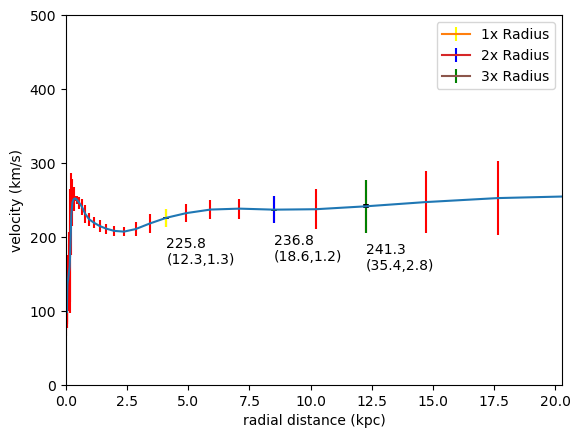

In [27]:
fig, ax = plt.subplots()
plotGal(mw, mwRd, ax)

Caption: Identical set up from previous figure but with data from the Milky Way rather than M31. The Milky Way unsurprisingly differs by having much lower uncertainties do to our proximity. This also leads to a smoother plot, as it's likely the means are closer to the true values.

In [28]:
vratios(mw, mwRd, 300)

Using dv errors:
Radius ratio (r300/r1): 341.811
Expected velocity ratio (v300/v1) from Newton's law: 0.054
Observed velocity ratio (v300/v1): 1.002 ± 0.468
2-sigma bounds: [0.067, 1.938]
Consistent with Newton's law within 2-sigma? False


In [29]:
vratios(mw, mwRd, 2, err='err')

Using err errors:
Radius ratio (r2/r1): 2.074
Expected velocity ratio (v2/v1) from Newton's law: 0.694
Observed velocity ratio (v2/v1): 1.049 ± 0.008
2-sigma bounds: [1.033, 1.064]
Consistent with Newton's law within 2-sigma? False


The Milky Way shows stronger deviations from Newton's laws than m31. At twice the luminous radius, the observed ratio (1.049) significantly exceeds the Newtonian expectation (0.694). At very large radii, velocities remain nearly constant rather than dropping as predicted. Unlike the m31 data the Milky way also disargrees with Newton's laws at very large radii (around 300 times the luminous radii). Therefore, this data gives a much stronger claim for the existence of dark matter. 